In [32]:
# math
import numpy as np  
import random

# handling table data
import pandas as pd 

import warnings; 
warnings.filterwarnings('ignore')

# statistics
import scipy.stats as scis
import scipy

import sys; sys.path.append('../')
import utils
import itertools

# visualization
import seaborn as sns
import plotly.express as px # 3d plot
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt; plt.style.use('ggplot')

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina' 

%matplotlib inline

# Data preparation

In [3]:
# download dataset from google drive
!wget -O ../data/category_procesed.csv 'https://drive.google.com/uc?export=download&id=1AMhHdC8I1wZwd6wvPA_blgwWNR6iqyld'

--2020-04-06 17:16:49--  https://drive.google.com/uc?export=download&id=1MFv0UsIbLChJxNgzYbJ8fCgdn_166507
Resolving drive.google.com (drive.google.com)... 172.217.23.142, 2a00:1450:4001:81e::200e
Connecting to drive.google.com (drive.google.com)|172.217.23.142|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2020-04-06 17:16:50 ERROR 404: Not Found.



In [33]:
# read csv file
data = pd.read_csv('../data/category_procesed.csv', index_col=0)

# skulptor removed since freqs are smaller that 5! It's unsuitible for chi-square test
observed_freqs = pd.crosstab(data[data['category'] != 'skulptory']['category'], data['sign'])
observed_freqs.iloc[1:5, :]

sign,Bliznecy,Deva,Kozerog,Lev,Oven,Rak,Ryby,Scorpion,Strelec,Telec,Vecy,Vodoley
category,,,,,,,,,,,,
arhitektory,112,110,105,128,141,116,133,127,113,145,116,133
artisty,144,136,135,121,151,145,153,137,130,130,133,134
astronomy,68,62,59,58,73,52,54,77,67,73,71,66
basketballs,266,259,218,232,264,241,291,220,203,263,228,227


### How many sample we have for each profession?

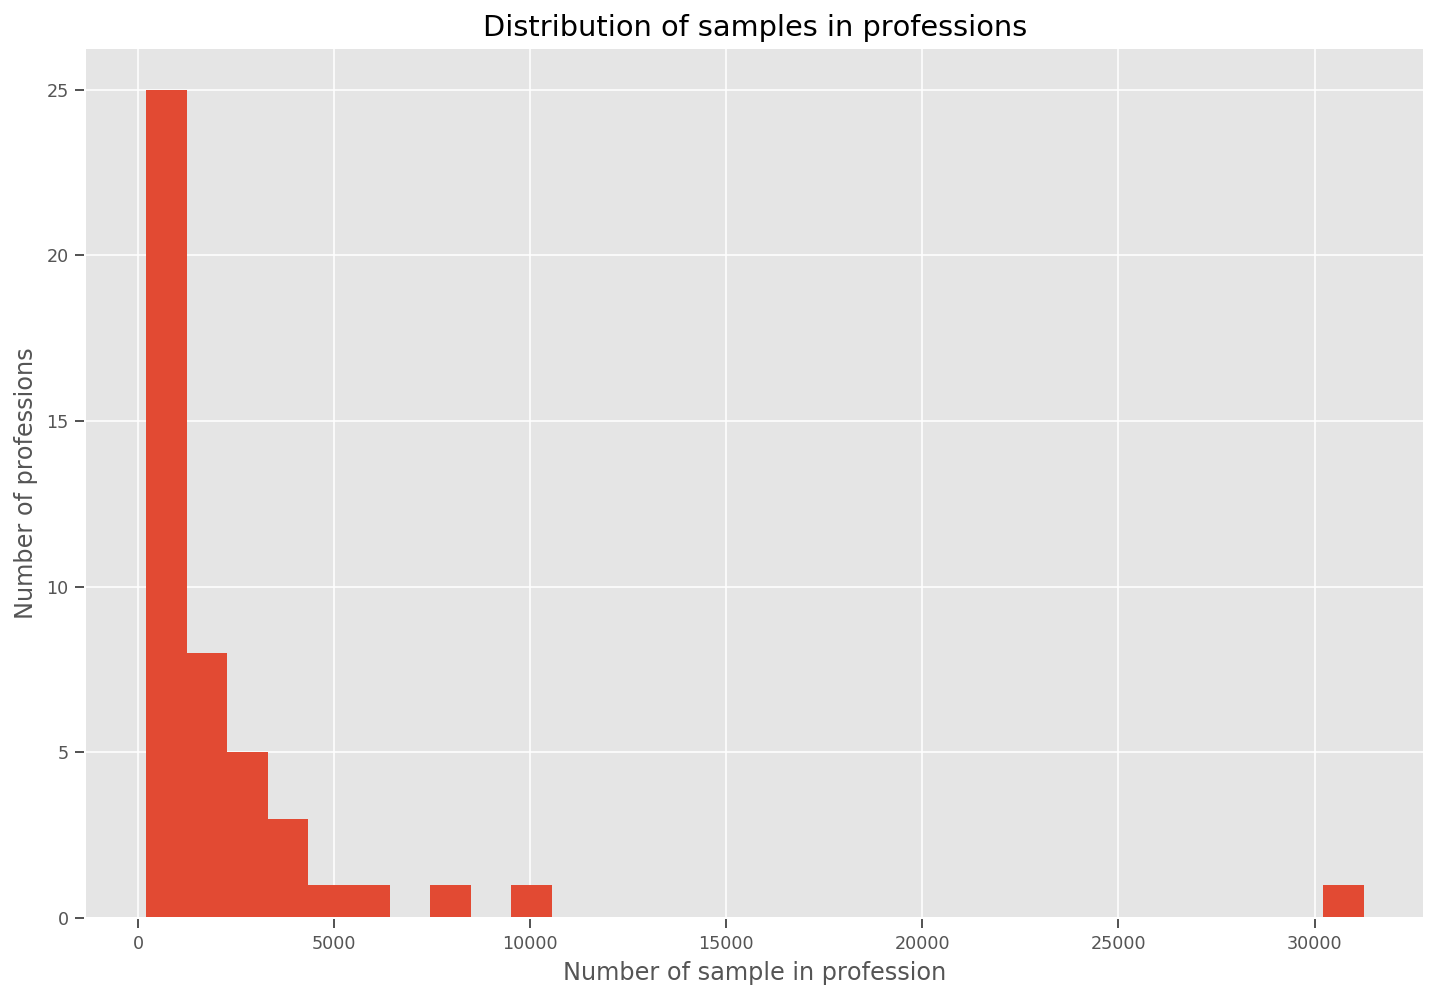

In [34]:
num_professions = observed_freqs.shape[0]
sample_summ_per_proff = observed_freqs.sum(axis=1).sort_values(ascending=False)

fig = plt.figure(figsize=(12, 8))
plt.hist(sample_summ_per_proff, bins=30);
plt.xlabel("Number of sample in profession")
plt.ylabel("Number of professions")
plt.title("Distribution of samples in professions");

### Distribution of sample's birth years in each profession

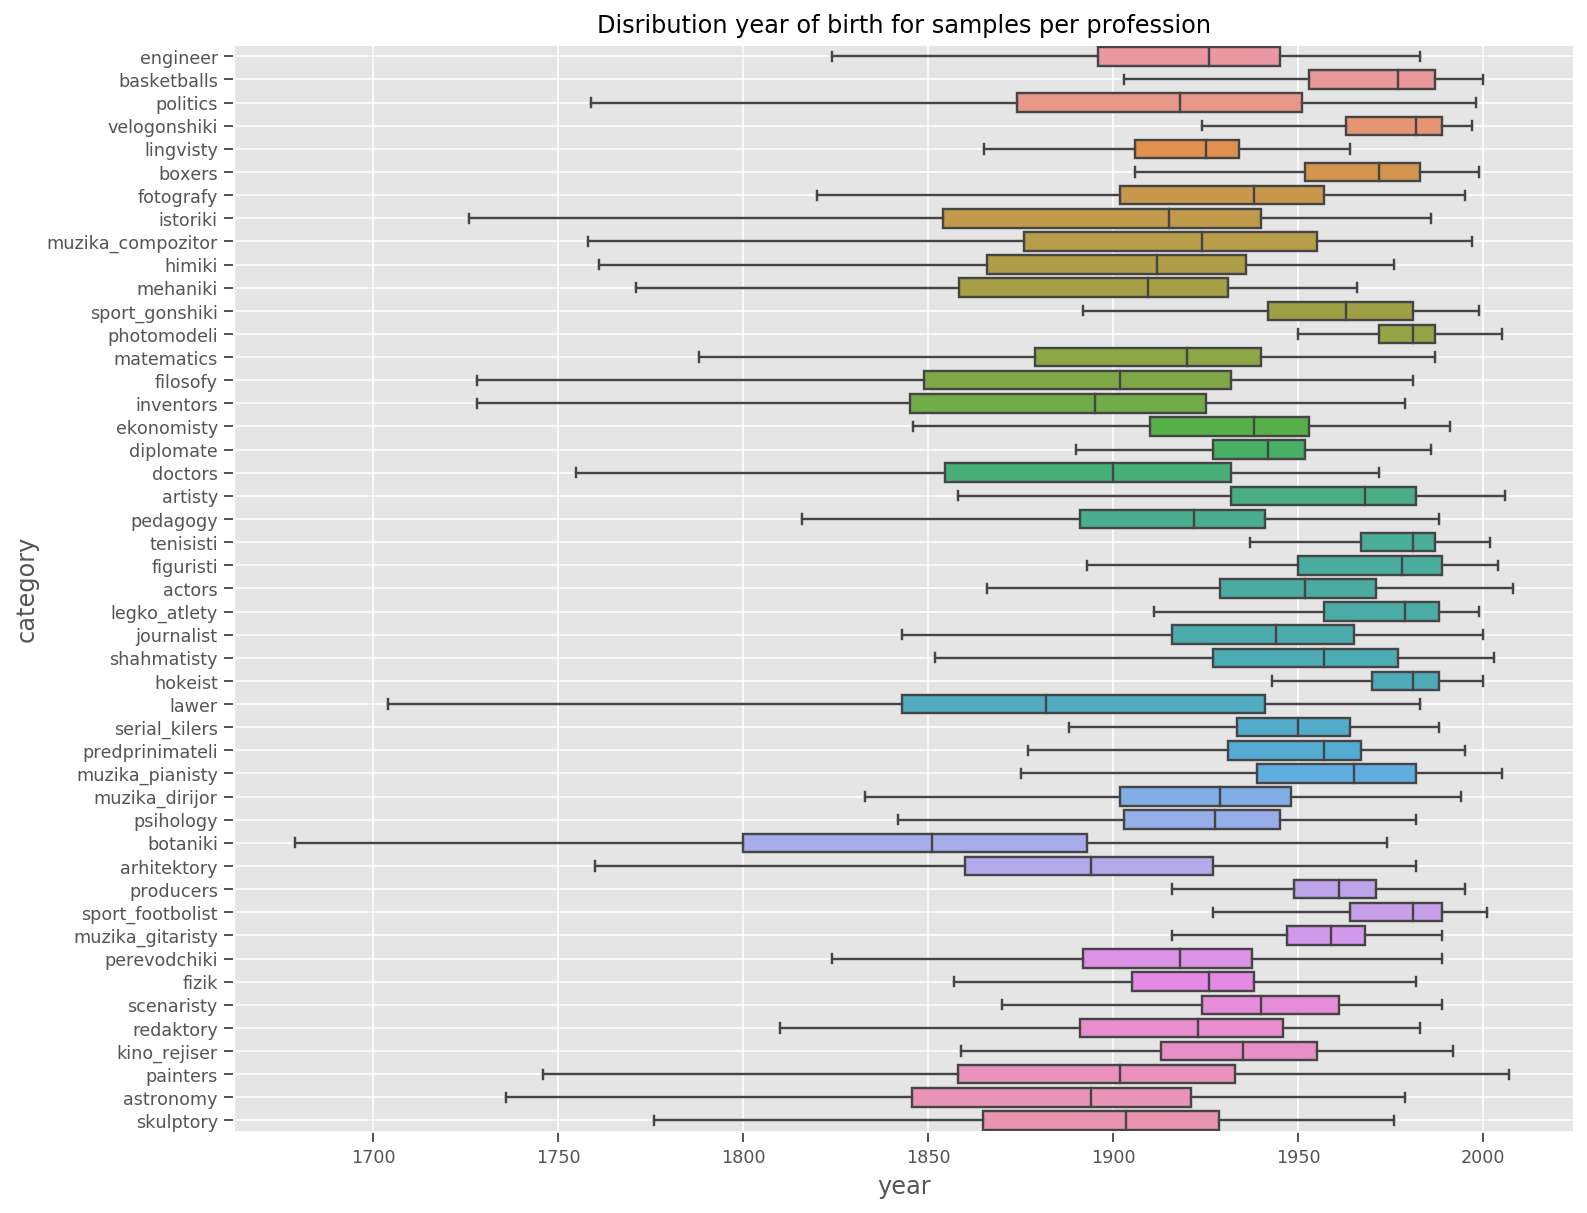

In [35]:
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":12,"axes.labelsize":12})  
fig = plt.figure(figsize=(12, 10))
sns.boxplot(x='year', y='category', data=data, showfliers=False);
plt.title("Disribution year of birth for samples per profession");
plt.grid('on')

# Pearson's chi-squared test (Goodness-of-fit)

In [36]:
# held test for all professions
professions = observed_freqs.index.values

# write test result, True if null hypothesis rejected
results_of_testing_for_all_profession = [] 

# loop over each profession separately
for i, prof in enumerate(professions):
    observed = observed_freqs.loc[prof, :].values
    expected = np.zeros_like((observed)) + round((1/12) * sum(observed))
    
    result_of_test = utils.chi_square_goodness_of_fit(observed, expected, verbose=0, accuracy=0.95)
    results_of_testing_for_all_profession.append(result_of_test)

# sanity check
print(f'At least one profession has confirmed alternative hypothesis? {True in results_of_testing_for_all_profession}')

At least one profession has confirmed alternative hypothesis? True


## Visualization

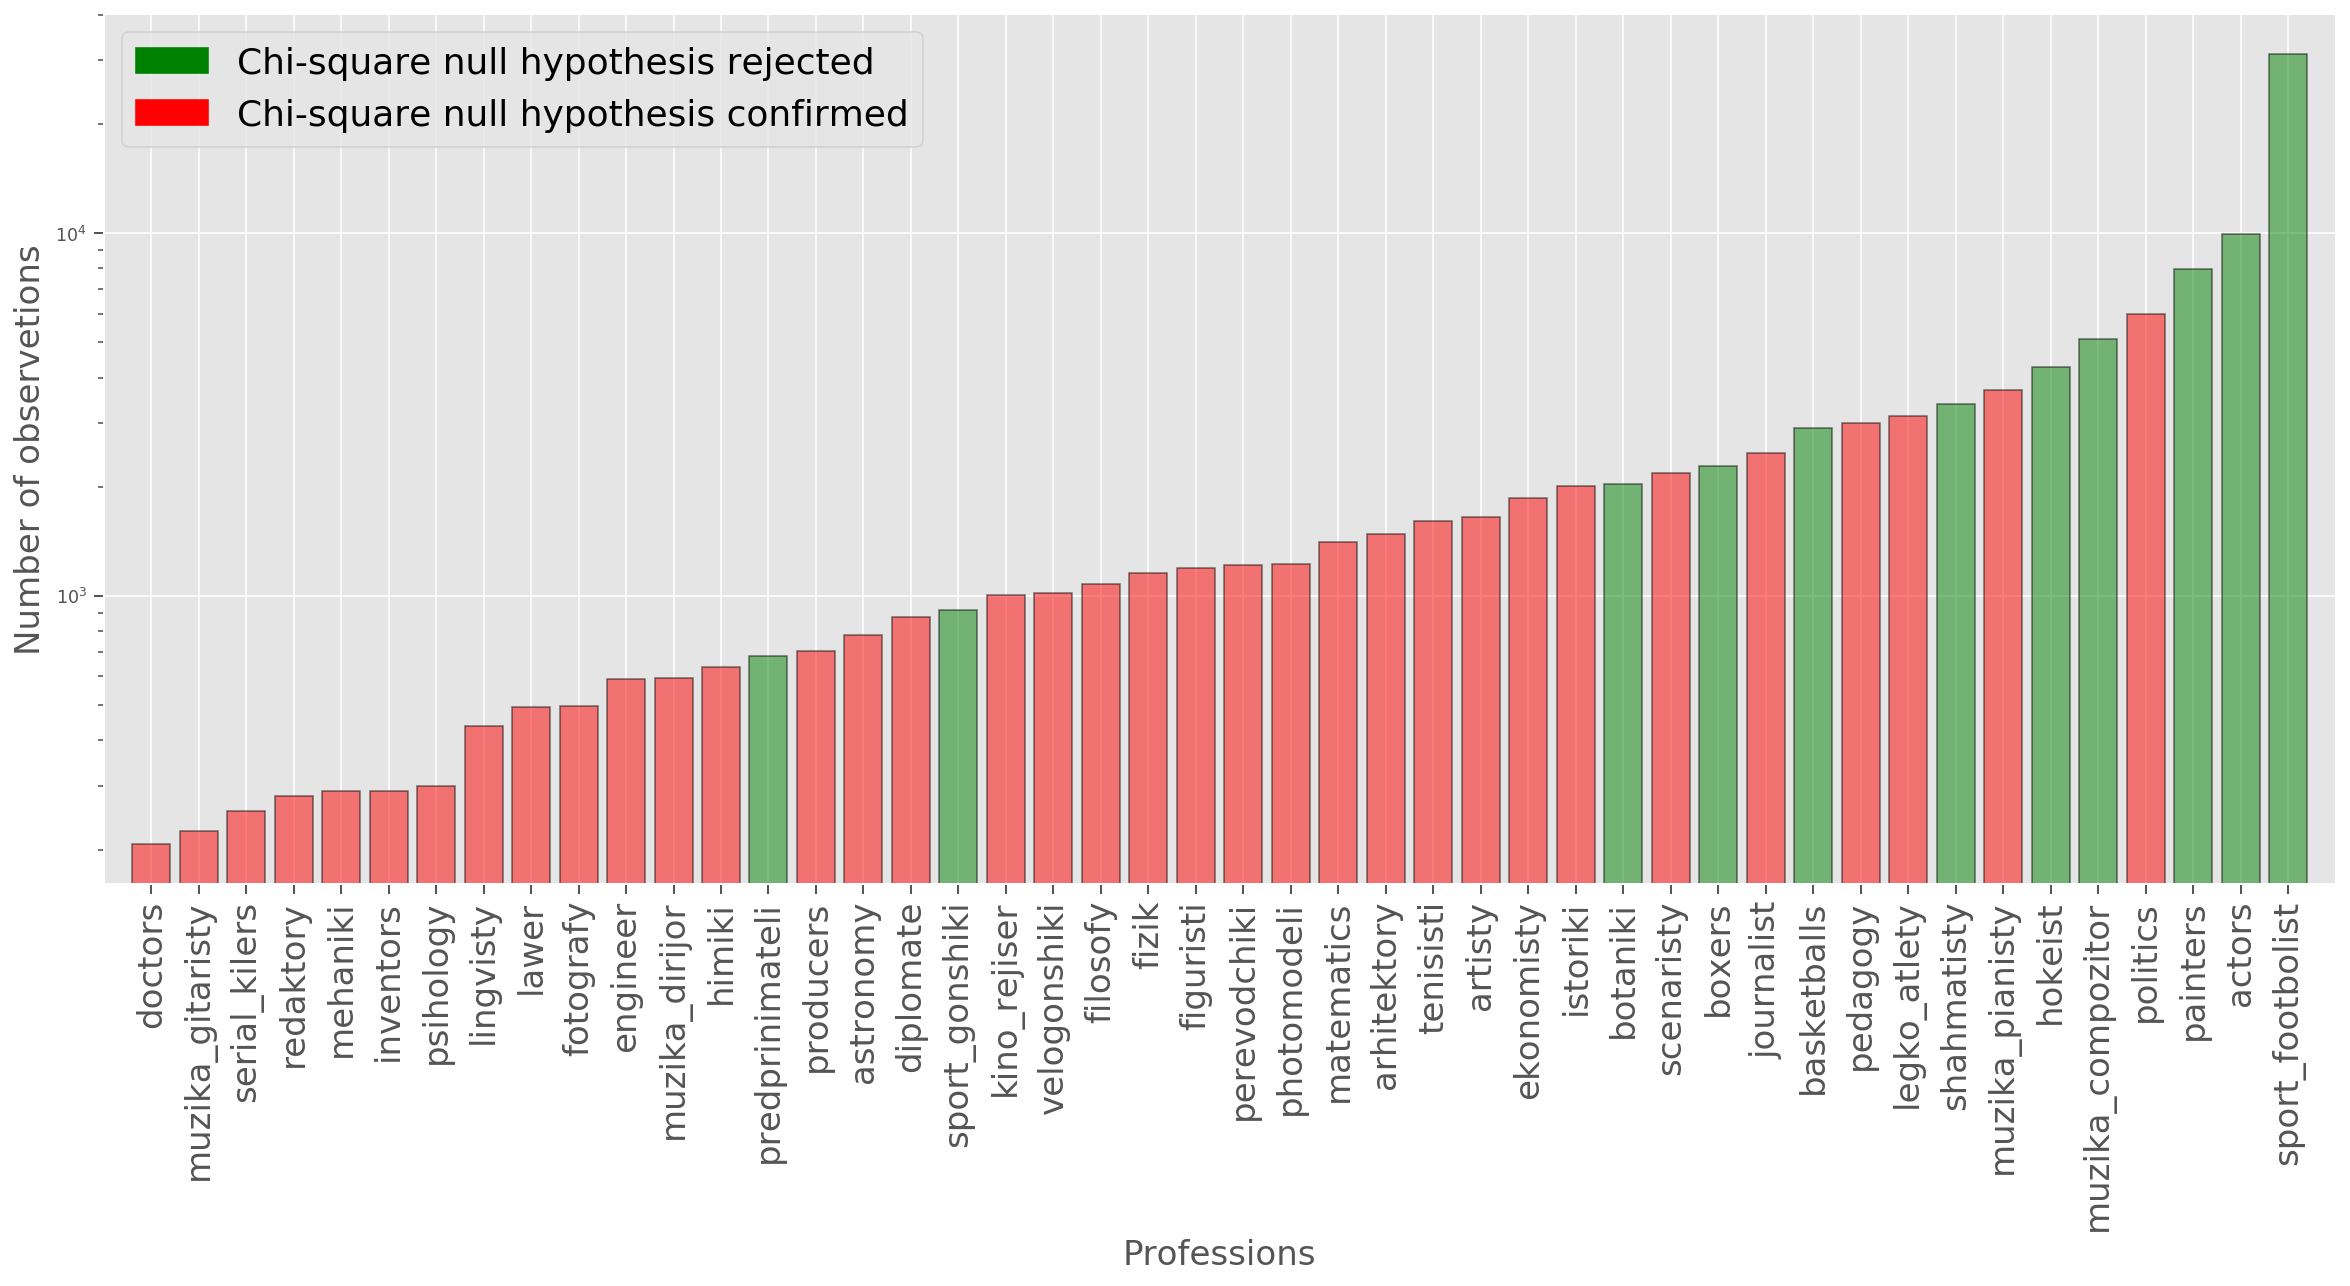

In [37]:
# map 1 with green color and 0 with red
bars_colors = list(map(lambda x: 'green' if x == 1 else 'red', np.array(results_of_testing_for_all_profession, int)))

# concat all variables in one dataframe and sort them 
data_to_plot = pd.concat([np.sum(observed_freqs, 1), pd.Series(bars_colors, index=observed_freqs.index)], 
          axis=1).sort_values(by=0)


plt.rcParams["legend.fontsize"] = 18
plt.figure(figsize=(20, 8))
plt.bar(x=range(len(data_to_plot)), height=data_to_plot[0], color=data_to_plot[1], 
        width=0.8, edgecolor='black', alpha=0.5);
plt.xticks(range(len(data_to_plot)), data_to_plot.index.values)
plt.xticks(rotation=90, size=17);
plt.yscale('log')
plt.xlim([-1,len(data_to_plot)])
plt.ylabel('Number of observetions', fontsize=17)
plt.xlabel('Professions', fontsize=17);

red_patch = mpatches.Patch(color='green', label='Chi-square null hypothesis rejected')
green_patch = mpatches.Patch(color='red', label='Chi-square null hypothesis confirmed')
plt.legend(handles=[red_patch, green_patch]);

# Pearson's chi-squared test (Independence)

In [38]:
# degree of freedom becomes dramaticly long when we use all profession (categories)
chi2, p, df, expected_freqs_ = scis.chi2_contingency(observed_freqs)
# critical value of chi for defined by user accuracy 
crit = scipy.stats.chi2.ppf(q = 0.95, df = df) 

# show results
print(f'Degree of freedom - {df}') 
print(f'P_value - {p}')
print(f'Critical value - {crit}')
print(f'Calculated Chi-square value - {chi2}')       
print('Null hypothesis is refected!') if chi2 > crit else print('Null hypothesis is confirmed!')

Degree of freedom - 495
P_value - 4.4927518254293616e-07
Critical value - 547.8659538616452
Calculated Chi-square value - 665.2745568207469
Null hypothesis is refected!


### Randomly select 10 professions and you can see that hypothesis confirmed

In [39]:
# randomly sample 10 professions from the list
random_profs = 10
rnd_profs = random.sample(list(observed_freqs.index.values), random_profs)
observed_freqs_shorter = observed_freqs.loc[rnd_profs, :]

# calculate test
chi2, p, df, expected_freqs_shorter = scis.chi2_contingency(observed_freqs_shorter)
# critical value of chi for defined by user accuracy 
crit = scipy.stats.chi2.ppf(q = 0.95, df = df) 

# show results
print(f'Degree of freedom - {df}') 
print(f'P_value - {p}')
print(f'Critical value - {crit}')
print(f'Calculated Chi-square value - {chi2}')       
print('Null hypothesis is refected!') if chi2 > crit else print('Null hypothesis is confirmed!')
print('Professions in sample:\n',rnd_profs)

Degree of freedom - 99
P_value - 0.5537578068256082
Critical value - 123.2252214533618
Calculated Chi-square value - 96.45188251036035
Null hypothesis is confirmed!
Professions in sample:
 ['shahmatisty', 'producers', 'himiki', 'astronomy', 'botaniki', 'tenisisti', 'psihology', 'serial_kilers', 'muzika_dirijor', 'fizik']


### Calculate test for each professions pairs (each with each)
#### This part should be edited

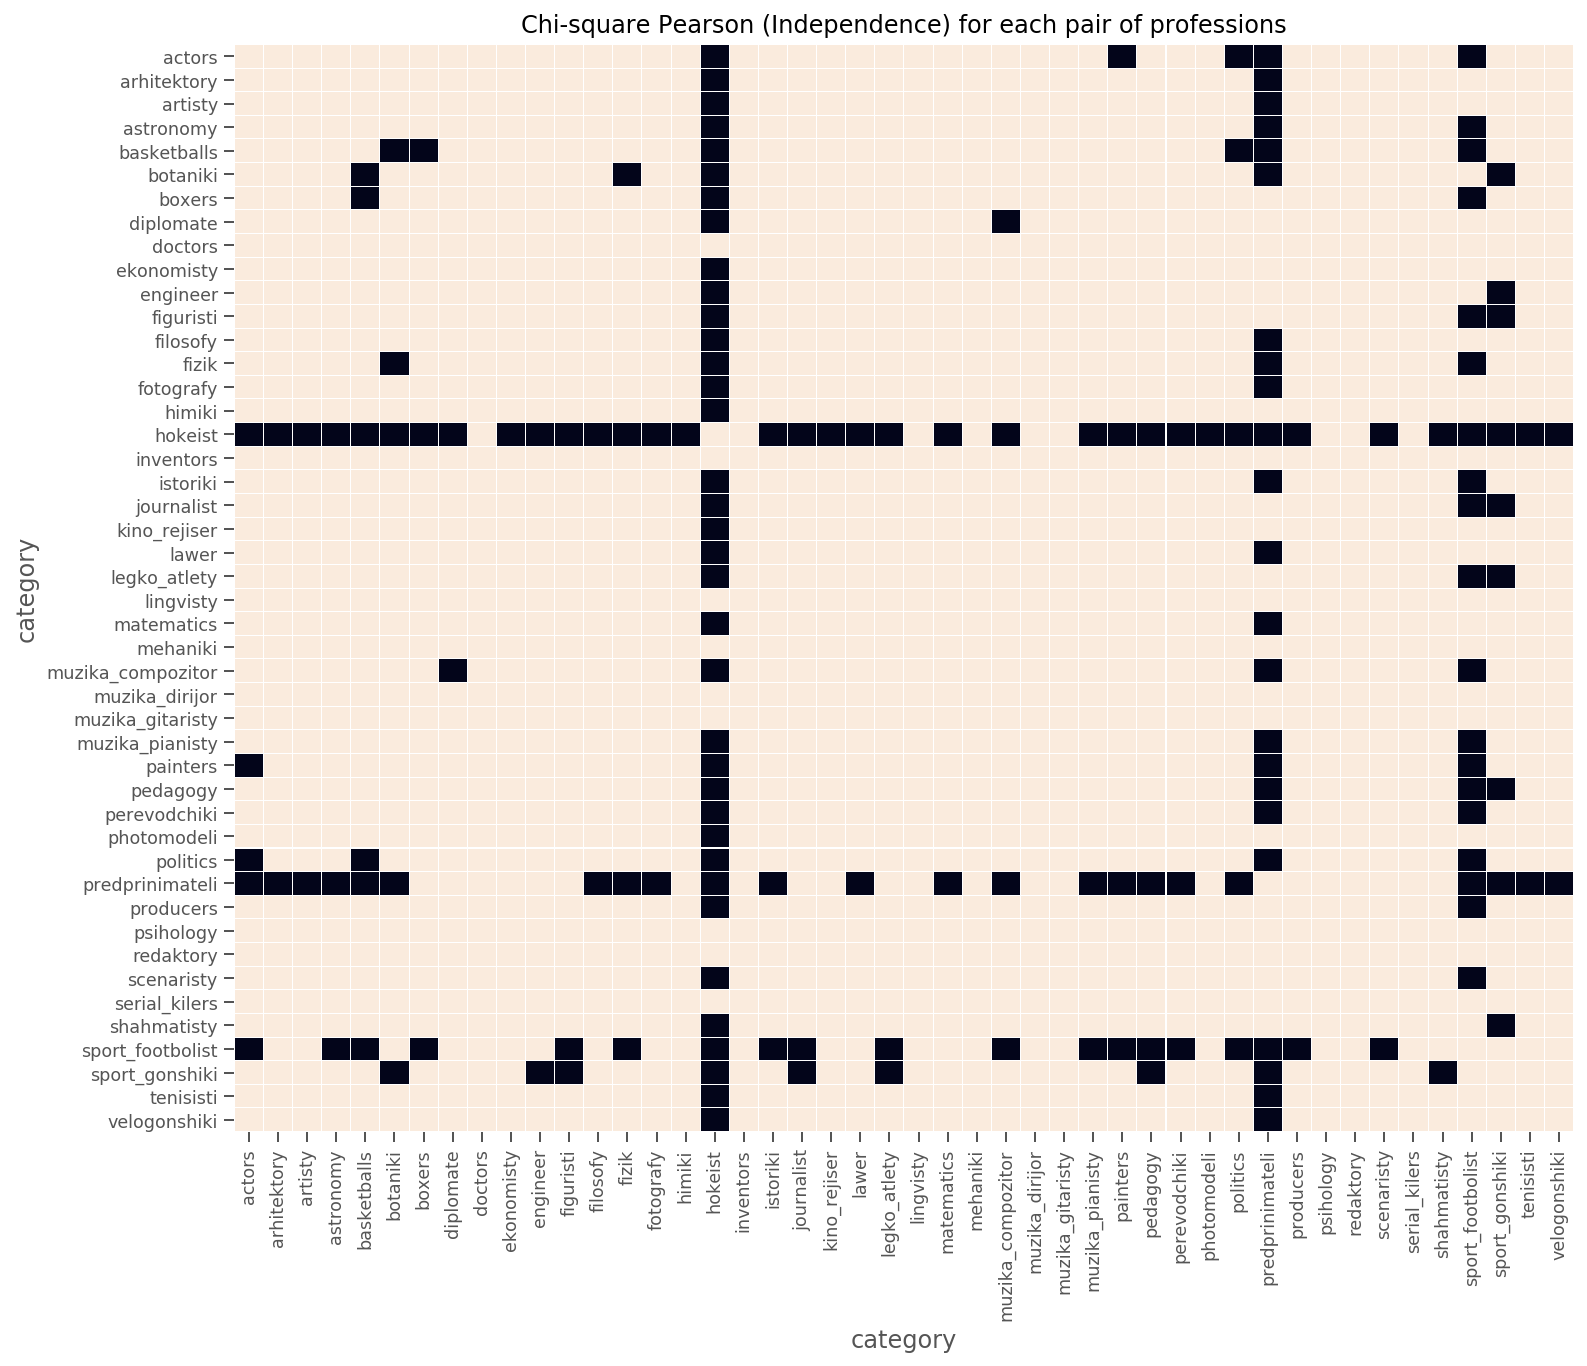

In [40]:
results = []
for j, i in itertools.product((observed_freqs.index), repeat=2):
    pair = [j, i]
    pairs = observed_freqs.loc[pair, :]
    
    # calculate test
    chi2, p, df, expected_freqs_shorter = scis.chi2_contingency(pairs)
    # critical value of chi for defined by user accuracy 
    crit = scipy.stats.chi2.ppf(q = 0.95, df = df) 
    results.append([1 if chi2 > crit else 0])    
    
# form DataFrame from result list
pairs = pd.DataFrame(data=np.stack(results).reshape(46, 46), 
                    index=observed_freqs.index, columns=observed_freqs.index)

# show results
fig = plt.figure(figsize=(12, 10))
sns.heatmap(pairs*-1, linewidths=0.01,  cbar=False);
plt.title('Chi-square Pearson (Independence) for each pair of professions');

# Cramer's V

In [41]:
cramers_value = round(utils.cramers_stat(observed_freqs.to_numpy()), 2)
print(f'Cramers V value for all professions - {cramers_value}')

Cramers V value for all professions - 0.02


### Calculate Cramer's V for each pair of professions

In [42]:
results = []
for j, i in itertools.product((observed_freqs.index), repeat=2):
    pair = [j, i]
    pairs = observed_freqs.loc[pair, :].to_numpy()
    
    r = utils.cramers_stat(pairs)
    results.append(r)   
    
print(f'min / max - {np.min(results)}/{round(np.max(results), 2)}') 
print(f'median - {round(np.median(results), 2)}')

min / max - 0.0/0.15
median - 0.06


### Let's check how professions distribute in dirth day, month and year space, i.e. in 3D space

In [43]:
# sample few professions from the list
sample = data[data['category'].isin(['hokeist', 'sport_gonshiki'])]

# make different random sample size in space
l = lambda x: np.clip(np.random.randn()**2, a_min=0, a_max=2)
sample['size'] = sample['category'].apply(l)

# normilize
sample['day'] = sample['day'] / 31
sample['month'] = sample['month'] / 31

# show plot
fig = px.scatter_3d(data_frame=sample.sample(frac=0.2), x='day', y='month', z='east_horo',
              color='category', opacity=0.6, size='size')
fig.show()